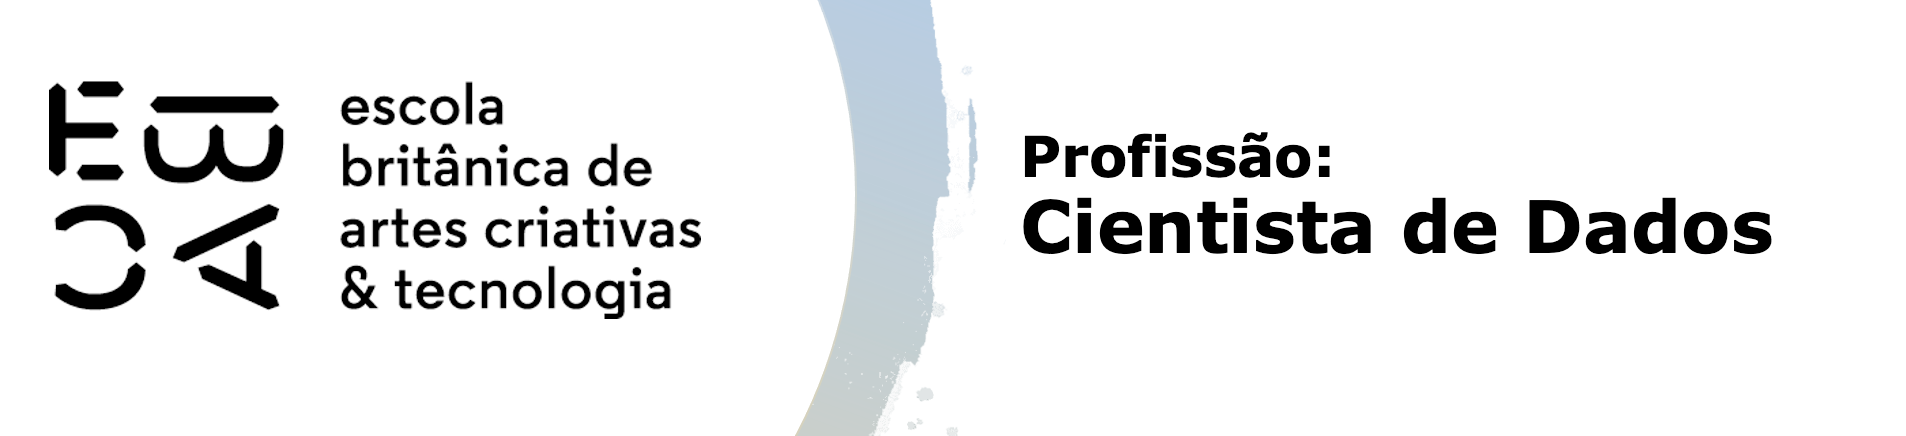

# Tarefa: Descritiva IV - Visualização de dados categorizados

Carregue a base ```NFP.ftr```. Essa base é proveniente do projeto #AMABiliDados, e contém dados da nota fiscal paulista cadastrados para doação automática para a AMA, Associação de Amigos do Autista.

A *Nota Fiscal Paulista* é um programa de incentivo do governo do estado de São Paulo, que retorna um pedacinho do ICMS ao consumidor sempre que solicita o registro do seu CPF na nota. Nesse programa, o contribuinte pode direcionar seus créditos a uma ONG, e quando faz isso, sempre que faz esse consumidor cadastrado faz uma compra, os créditos de notas emitidas pelo mesmo estabelecimento não identificadas (notas sem CPF) são "arrastados" para a ONG na forma de uma doação.

Clique no link, caso queira saber mais sobre a [AMA](https://www.ama.org.br/site/).<br>
Clique no link, caso queira saber como o cidadão pode ser um [doador da NFP](https://doacao1.ama.org.br/sitenfp).

Essa base possui dados das notas cujos contribuintes direcionaram seus créditos à AMA. Seus campos estão descritos abaixo:

|Campo|Descrição|
|:-|:-|
|CNPJ emit.| CNPJ do emitente da nota|
|Emitente| Nome fantasia do emitente da nota|
|No.| Número da nota fiscal|
|Data Emissão| Data de emissão da nota fiscal|
|Valor NF| Valor da nota fiscal|
|Data Registro| Data de registro no sistema da NFP|
|Créditos| Valor dos créditos (doação)|
|Situação do Crédito| Se o crédito já foi pago, está sendo processado etc.|
|Ano| Ano da emissão da nota|
|Semestre| Semestre da emissão da nota|
|Retorno| Valor do crédito dividido pelo valor da nota|
|flag_credito| Indicadora se a nota possui crédito positivo|
|categoria| Categorização da nota |

**OBJETIVO:** Algumas notas não dão retorno, o que pode ocorrer por diversos motivos, um deles seria a ocorrência de produtos não incentivados como cigarros e bebidas alcólicas. O nosso objetivo é tentar prever que tipo de nota tem maior ou menor propensão a fornecer créditos.

**Observação**: Esta é uma base real, havendo características de acordo. Pode haver uma variabilidade difícil de explicar, em parte por causa de uma freqüência de notas inconstante no tempo (por diversos motivos), em parte por haverem informações importantes, protegidas pela LGPD, não constantes na base, que pode interferir no crédito gerado, o que vai ocasionar uma variabilidade difícil de se explicar. *Welcome to the jungle*, A vida real é assim :)

In [7]:
# Importando as bibliotecas necessárias:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregando os dados
df = pd.read_pickle('base_nfp.pkl')
df.head()

,CNPJ emit.,Emitente,No.,Data Emissão,Valor NF,Data Registro,Créditos,Situação do Crédito,Ano,Semestre,Retorno,flag_credito,categoria
0,03.476.811/0741-98,DIA BRASIL SOCIEDADE LIMITADA,537,2017-06-30,24.68,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Mercado
1,43.101.310/0001-05,AUTO POSTO ZANWAL LTDA EPP,2894,2017-06-30,50.00,2017-06-30,0.00,Liberado,2017,1,0.000000,0,Auto posto
2,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,699,2017-06-30,27.00,2017-06-30,0.44,Liberado,2017,1,0.016296,1,Restaurantes
3,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,698,2017-06-30,111.50,2017-06-30,1.81,Liberado,2017,1,0.016233,1,Restaurantes
4,23.750.257/0001-66,OFICINA DO TRIGO PASTIFICIO PANIFICADORA BAR E RE,694,2017-06-30,125.00,2017-06-30,2.03,Liberado,2017,1,0.016240,1,Restaurantes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86956 entries, 64598 to 187645
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CNPJ emit.           86956 non-null  object        
 1   Emitente             86956 non-null  object        
 2   No.                  86956 non-null  int64         
 3   Data Emissão         86956 non-null  datetime64[ns]
 4   Valor NF             86956 non-null  float64       
 5   Data Registro        86956 non-null  datetime64[ns]
 6   Créditos             86956 non-null  float64       
 7   Situação do Crédito  86956 non-null  category      
 8   Ano                  86956 non-null  int64         
 9   Semestre             86956 non-null  int64         
 10  Retorno              86000 non-null  float64       
 11  flag_credito         86956 non-null  int64         
 12  categoria            86956 non-null  object        
 13  Retorno Positivo     86956

## 1. Análise da probabilidade de retorno

Considere somente os dados de janeiro de 2020 em diante para esta análise.

- Analise a proporção de notas que tiveram retorno>0 por categoria de estabelecimento. Esta análise pode ser por tabela ou gráfico.

In [26]:
# Filtrando os dados para janeiro de 2020 em diante
df['Data Emissão'] = pd.to_datetime(df['Data Emissão'])
df = df[df['Data Emissão'] >= '2020-01-01']


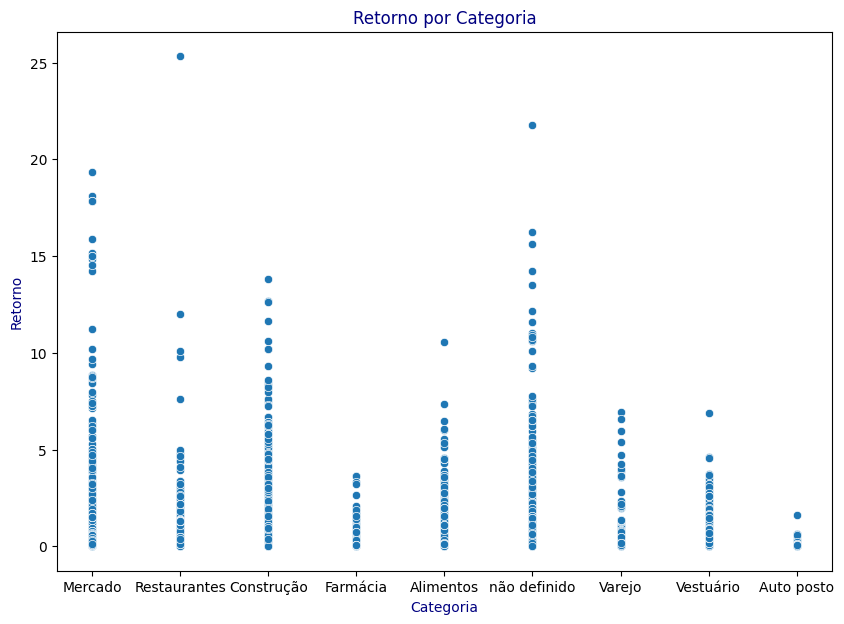

In [27]:
# Criando um scatterplot com os dados de retorno por categoria

fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(ax=ax, data=df[(df['Retorno'] > 0) & (df['Retorno'] < 200)], x='categoria', y='Retorno')
ax.set_title('Retorno por Categoria', color='navy')
ax.set_xlabel('Categoria', color='navy')
ax.set_ylabel('Retorno', color='navy')
plt.show()

# 0: A nota fiscal não gerou crédito.
# 1: A nota fiscal gerou crédito.

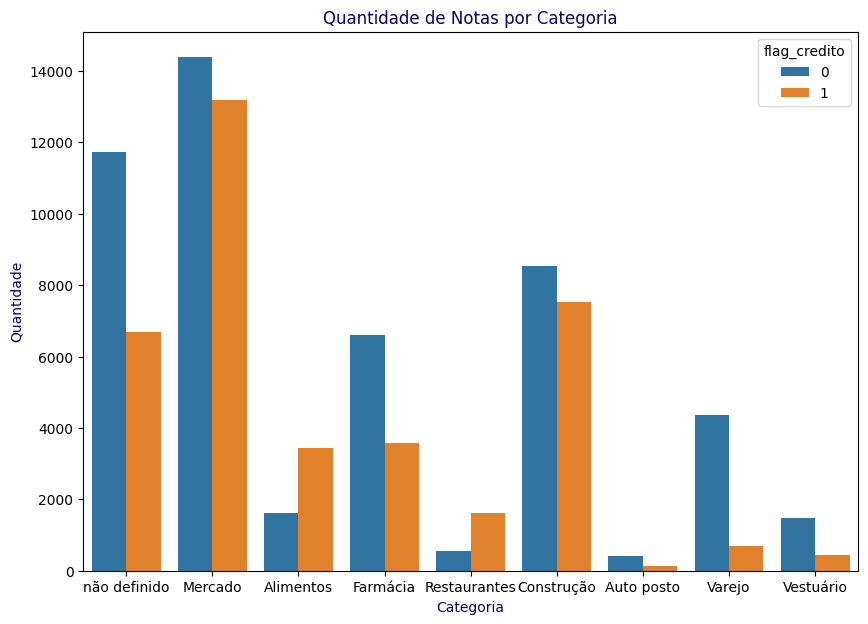

In [25]:
# Criando um countplot com a quantidade de notas por categoria e se houve retorno
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(ax=ax, data=df, x='categoria', hue='flag_credito')
ax.set_title('Quantidade de Notas por Categoria', color='navy')
ax.set_xlabel('Categoria', color='navy')
ax.set_ylabel('Quantidade', color='navy')
plt.show()

## 2. Cálculo do WOE

- Calcule o WOE das categorias, sendo que o evento em questão é a nota ter retorno>0.
- Analise este WOE por tabela e por gráfico.

In [28]:
# Criando uma nova coluna para indicar se houve retorno
df['Retorno Positivo'] = df['Retorno'] > 0

# Calculando a proporção de eventos positivos e negativos por categoria
proporcao_positivos = df.groupby('categoria')['Retorno Positivo'].mean()
proporcao_negativos = 1 - proporcao_positivos

# Calculando o WOE para cada categoria
woe = np.log(proporcao_positivos / proporcao_negativos)

# Exibindo o WOE em uma tabela
print(woe)


categoria
Alimentos       0.761062
Auto posto     -1.098612
Construção     -0.124921
Farmácia       -0.612208
Mercado        -0.087435
Restaurantes    1.078520
Varejo         -1.828866
Vestuário      -1.204199
não definido   -0.560662
Name: Retorno Positivo, dtype: float64


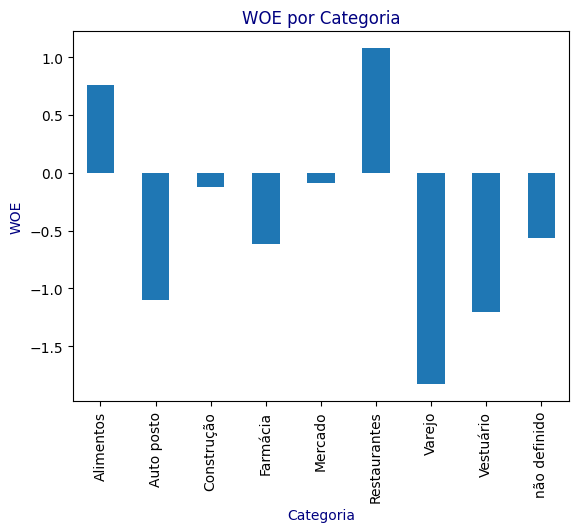

In [31]:
# Exibindo o WOE em um gráfico de barras
woe.plot(kind='bar')
plt.ylabel('WOE', color = 'navy')
plt.xlabel('Categoria', color = 'navy')
plt.title('WOE por Categoria', color='navy')
plt.show()

## 3. Cálculo do *Information Value*

Calcule o *IV* dessa variável.

In [32]:
# Calculando a proporção de eventos positivos e negativos por categoria
proporcao_positivos = df.groupby('categoria')['Retorno Positivo'].mean()
proporcao_negativos = 1 - proporcao_positivos

# Calculando o WOE para cada categoria
woe = np.log(proporcao_positivos / proporcao_negativos)

# Calculando a diferença entre a proporção de eventos positivos e negativos
diff = proporcao_positivos - proporcao_negativos

# Calculando o IV
iv = np.sum(diff * woe)

print('Information Value:', iv)


Information Value: 3.6745859583690423


## 4. Conclua

Não se esqueça de registrar suas conclusões em uma célula de texto. <font color='red'>**Sugestão:**</font> tente alterar a cor da fonte nesta célula para diferenciá-la das demais.


### <font color='navy'>Análise:</font><br>

 <font color = 'dimgrey'> O WOE é uma medida de quão preditiva é uma característica em relação a um evento de interesse, neste caso, se uma nota fiscal tem retorno maior que zero.</font>

>  Com base nos valores de Weight of Evidence (WOE), a categoria com o **maior WOE** é **Restaurantes (1.078520)**, o que indica que as notas fiscais de restaurantes têm a maior probabilidade de ter um retorno maior que zero em comparação com a média geral.

> Por outro lado, a categoria com o **menor WOE** é **Varejo (-1.828866)**, o que indica que as notas fiscais de varejo têm a menor probabilidade de ter um retorno maior que zero em comparação com a média geral.



---



<font color = 'dimgrey'> O valor de Information Value (IV) calculado para 'categoria' é **3.6745859583690423**. </font>

<font color = 'dimgrey'> O IV é uma medida de quão útil é uma variável para prever um evento. Em geral, um valor de IV maior indica que a variável é mais útil para a previsão. No entanto, o IV deve ser interpretado com cautela, pois um valor muito alto pode indicar "overfitting", ou seja, o modelo pode estar se ajustando demais aos dados de treinamento e pode não generalizar bem para novos dados.</font>

<font color = 'dimgrey'> Orientação geral para interpretar os valores de IV:

- **< 0.02**: A variável tem pouca ou nenhuma capacidade preditiva.
- **0.02 - 0.1**: A variável tem uma capacidade preditiva fraca.
- **0.1 - 0.3**: A variável tem uma capacidade preditiva média.
- **0.3 - 0.5**: A variável tem uma capacidade preditiva forte.
- **> 0.5**: A variável tem uma capacidade preditiva muito forte. </font>

>  Portanto, com um IV de **3.67**, 'categoria' tem uma capacidade preditiva forte para prever se uma nota fiscal terá um retorno maior que zero.